In [1]:
import pandas as pd
import numpy as np
import os
import Levenshtein as Lev
from sklearn.utils import shuffle
import datetime as dt
import editdistance


In [2]:
#data from nbc release, not cresci
rus_tweets = pd.read_csv('tweets.csv', na_filter=False)
rus_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203451 entries, 0 to 203450
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   user_id                203451 non-null  object
 1   user_key               203451 non-null  object
 2   created_at             203451 non-null  object
 3   created_str            203451 non-null  object
 4   retweet_count          203451 non-null  object
 5   retweeted              203451 non-null  object
 6   favorite_count         203451 non-null  object
 7   text                   203451 non-null  object
 8   tweet_id               203451 non-null  object
 9   source                 203451 non-null  object
 10  hashtags               203451 non-null  object
 11  expanded_urls          203451 non-null  object
 12  posted                 203451 non-null  object
 13  mentions               203451 non-null  object
 14  retweeted_status_id    203451 non-null  object
 15  

In [3]:
samp_rus_tweets = rus_tweets[0:10]
samp_rus_tweets = samp_rus_tweets['text']
samp_rus_tweets = samp_rus_tweets.str.replace(' ','')
samp_rus_tweets = samp_rus_tweets.str.replace('RT@','')

In [4]:
samp_rus_tweets


0           #ThingsDoneByMistakekissingauntieinthelips
1    mc_derpin:#TheOlderWeGetthemorepessimisticwear...
2    dmataconis:ReadyToFeelLikeAFailure?JoanOfArcWa...
3        Amen!#blacklivesmatterhttps://t.co/wGffaOqgzl
4    NahBabyNah:Twitchy:ChuckToddcaughtoutthereshil...
5    mcicero10:#BernieSanders#Trumppeopleshouldrall...
6    ItsJustJaynie:@HillaryClintonTheundecidedvoter...
7                               @TodayCleveland'noway'
8    @NickTomaWBREHi,Nick!We'reholdinga"MinersforTr...
9       What.Is.A.Resolution#My4WordNewYearsResolution
Name: text, dtype: object

In [5]:
from itertools import product
dist = np.empty(samp_rus_tweets.shape[0]**2, dtype=int)
for i, x in enumerate(product(samp_rus_tweets, repeat=2)):
     dist[i] = editdistance.eval(*x)
dist_df = pd.DataFrame(dist.reshape(-1, samp_rus_tweets.shape[0]))

In [6]:
print(dist_df)

     0   1   2   3    4    5    6    7    8    9
0    0  59  85  41  102   85   78   35  103   40
1   59   0  73  47   95   83   78   63   91   60
2   85  73   0  80   90   95   88   89   92   84
3   41  47  80   0   98   93   79   37   96   46
4  102  95  90  98    0  106  103  107  100  105
5   85  83  95  93  106    0   91   98   99   93
6   78  78  88  79  103   91    0   82  103   80
7   35  63  89  37  107   98   82    0  109   40
8  103  91  92  96  100   99  103  109    0  105
9   40  60  84  46  105   93   80   40  105    0


In [7]:
mean_dist = dist_df.mean()
mean_dist.mean()


74.11999999999999

In [8]:
rus_user_list = []

In [9]:
rus_tweets_sorted = rus_tweets.sort_values(by=['user_key'])
rus_tweets_sorted = rus_tweets_sorted['text']
rus_tweets_sorted = rus_tweets_sorted.str.replace(' ','')
rus_tweets_sorted = rus_tweets_sorted.str.replace('RT@','')
#sorted1 - sorted28 corresponds to user1 - user 28
rus_tweets_sorted1 = rus_tweets_sorted[4171:4207]

rus_tweets_sorted2 = rus_tweets_sorted[4208:4224]
rus_tweets_sorted3 = rus_tweets_sorted[4225:4289]
rus_tweets_sorted4 = rus_tweets_sorted[4290:4327]
rus_tweets_sorted5 = rus_tweets_sorted[4328:4340]
rus_tweets_sorted6 = rus_tweets_sorted[4341:4380]
#rus_tweets_sorted7 = rus_tweets_sorted[4381:4381]
rus_tweets_sorted8 = rus_tweets_sorted[4382:4432]
rus_tweets_sorted9 = rus_tweets_sorted[4433:4434]
rus_tweets_sorted10 = rus_tweets_sorted[4435:4487]
rus_tweets_sorted11 = rus_tweets_sorted[4488:4892]
rus_tweets_sorted12 = rus_tweets_sorted[4893:4908]
rus_tweets_sorted13 = rus_tweets_sorted[4909:4932]

In [10]:
rus_tweets_sorted14 = rus_tweets_sorted[4933:4941]
rus_tweets_sorted15 = rus_tweets_sorted[4942:5015]
rus_tweets_sorted16a = rus_tweets_sorted[5016:9284]
rus_tweets_sorted16b = rus_tweets_sorted[9285:14284]
#rus_tweets_sorted17 = rus_tweets_sorted[14285:14285]
rus_tweets_sorted18 = rus_tweets_sorted[14286:14317]
#rus_tweets_sorted19 = rus_tweets_sorted[14318:14318]
rus_tweets_sorted20 = rus_tweets_sorted[14319:14469]
rus_tweets_sorted21 = rus_tweets_sorted[14470:15814]
rus_tweets_sorted22 = rus_tweets_sorted[15815:15899]
rus_tweets_sorted23 = rus_tweets_sorted[15900:15902]
rus_tweets_sorted24 = rus_tweets_sorted[15903:15939]
#i think below is bad data
#rus_tweets_sorted25 = rus_tweets_sorted[15940:15946]
#rus_tweets_sorted26 = rus_tweets_sorted[15940:15946]
#rus_tweets_sorted27 = rus_tweets_sorted[15940:15946]
#rus_tweets_sorted28 = rus_tweets_sorted[15940:15946]
rus_user_list.append(rus_tweets_sorted1)
rus_user_list.append(rus_tweets_sorted2)
rus_user_list.append(rus_tweets_sorted3)
rus_user_list.append(rus_tweets_sorted4)
rus_user_list.append(rus_tweets_sorted5)
rus_user_list.append(rus_tweets_sorted6)
rus_user_list.append(rus_tweets_sorted8)
rus_user_list.append(rus_tweets_sorted9)
rus_user_list.append(rus_tweets_sorted10)
rus_user_list.append(rus_tweets_sorted11)
rus_user_list.append(rus_tweets_sorted12)
rus_user_list.append(rus_tweets_sorted13)
rus_user_list.append(rus_tweets_sorted14)
rus_user_list.append(rus_tweets_sorted15)
rus_user_list.append(rus_tweets_sorted16a)
rus_user_list.append(rus_tweets_sorted16b)
rus_user_list.append(rus_tweets_sorted18)
rus_user_list.append(rus_tweets_sorted20)
rus_user_list.append(rus_tweets_sorted21)
rus_user_list.append(rus_tweets_sorted22)
rus_user_list.append(rus_tweets_sorted23)
rus_user_list.append(rus_tweets_sorted24)

In [11]:
dist = np.empty(rus_tweets_sorted1.shape[0]**2, dtype=int)
for i, x in enumerate(product(rus_tweets_sorted1, repeat=2)):
     dist[i] = editdistance.eval(*x)
dist_df = pd.DataFrame(dist.reshape(-1, rus_tweets_sorted1.shape[0]))
mean_dist = dist_df.mean()
mean_dist.mean()

86.42438271604937

In [12]:
#page 32 has more data set info
# find Lev distance for the user #2
dist = np.empty(rus_tweets_sorted2.shape[0]**2, dtype=int)
for i, x in enumerate(product(rus_tweets_sorted2, repeat=2)):
     dist[i] = editdistance.eval(*x)
dist_df = pd.DataFrame(dist.reshape(-1, rus_tweets_sorted2.shape[0]))
mean_dist = dist_df.mean()
mean_dist.mean()


76.03125

In [13]:
dist = np.empty(rus_tweets_sorted3.shape[0]**2, dtype=int)
for i, x in enumerate(product(rus_tweets_sorted3, repeat=2)):
     dist[i] = editdistance.eval(*x)
dist_df = pd.DataFrame(dist.reshape(-1, rus_tweets_sorted3.shape[0]))
mean_dist = dist_df.mean()
mean_dist.mean()


94.25

In [17]:
mean_edit_rus = []
for user in rus_user_list:
    dist = np.empty(user.shape[0]**2, dtype=int)
    for i, x in enumerate(product(user, repeat=2)):
         dist[i] = editdistance.eval(*x)
    dist_df = pd.DataFrame(dist.reshape(-1, user.shape[0]))
    mean_dist = dist_df.mean()
    mean_edit_rus.append(mean_dist.mean())
#print(mean_edit)
# Lev for 16
#(98.90660460926716 + 99.0721426541758)/2    

In [18]:
# Real Tweets Data Set
real_tweets = pd.read_csv('datasets_full.csv/genuine_accounts.csv/tweets.csv', na_filter=False)
real_tweets['user_id'] = real_tweets['user_id'].str.replace(' ','')
real_tweets.fillna('')
real_tweets.info()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,3,5,6,8,12,13,14,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839362 entries, 0 to 2839361
Data columns (total 25 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   id                       object
 1   text                     object
 2   source                   object
 3   user_id                  object
 4   truncated                object
 5   in_reply_to_status_id    object
 6   in_reply_to_user_id      object
 7   in_reply_to_screen_name  object
 8   retweeted_status_id      object
 9   geo                      object
 10  place                    object
 11  contributors             object
 12  retweet_count            object
 13  reply_count              object
 14  favorite_count           object
 15  favorited                object
 16  retweeted                object
 17  possibly_sensitive       object
 18  num_hashtags             object
 19  num_urls                 object
 20  num_mentions             object
 21  created_at               object

In [19]:
# real_tweets['user_id'] = real_tweets['user_id'].astype(str).astype(int)
# real_tweets['user_id'].tail()
#real_tweets.info()
real_tweets_sorted = real_tweets.sort_values(by=['user_id'])
real_tweets_sorted = real_tweets_sorted['text']
real_tweets_sorted = real_tweets_sorted.str.replace(' ','')
real_tweets_sorted = real_tweets_sorted.str.replace('RT@','')


In [20]:
real_tweets_sorted.head()


2839361                                                     
2818997                          Ellenhttp://t.co/ZUUCv9mYgZ
2818995                       Bigcut.https://t.co/7hw5mfrt2Y
2818993    WhywouldDereklookphoneandthenatruckhithim?Just...
2818992                                         @DempeoMDMer
Name: text, dtype: object

In [29]:
real_tweets_sorted1 = real_tweets_sorted[981668:982560]
real_tweets_sorted2 = real_tweets_sorted[982561:985677]
real_tweets_sorted3 = real_tweets_sorted[985678:988132]
real_tweets_sorted4 = real_tweets_sorted[988133:991368]
real_tweets_sorted5 = real_tweets_sorted[991369:994578]
real_tweets_sorted6 = real_tweets_sorted[994579:997773]
real_tweets_sorted7 = real_tweets_sorted[997774:1000994]
real_tweets_sorted8 = real_tweets_sorted[1000995:1004171]
real_tweets_sorted9 = real_tweets_sorted[1004172:1007390]
real_tweets_sorted10 = real_tweets_sorted[1007391:1010510]
real_tweets_sorted11 = real_tweets_sorted[1010511:1013599]
real_tweets_sorted12 = real_tweets_sorted[1013600:1013941]
real_tweets_sorted13 = real_tweets_sorted[1013942:1017137]
real_tweets_sorted14 = real_tweets_sorted[1017138:1019436]
real_tweets_sorted15 = real_tweets_sorted[1019437:1022622]
real_tweets_sorted16 = real_tweets_sorted[1022623:1025845]
real_tweets_sorted17 = real_tweets_sorted[1025846:1029038]
real_tweets_sorted18 = real_tweets_sorted[1029039:1032277]
real_tweets_sorted19 = real_tweets_sorted[1032278:1035441]
real_tweets_sorted20 = real_tweets_sorted[1035442:1036606]
real_tweets_sorted21 = real_tweets_sorted[1036607:1039781]
real_tweets_sorted22 = real_tweets_sorted[1039782:1042953]
real_tweets_sorted23 = real_tweets_sorted[1042954:1045336]
real_tweets_sorted24 = real_tweets_sorted[1045337:1045417]
real_tweets_sorted25 = real_tweets_sorted[1045418:1048574]
real_user_list = []
# import copy
# for real_user in range(1, 26):
#     name = "real_tweets_sorted"+str(real_user)
#     print(name)
#     real_user_list.append(copy.deepcopy(name))
# print(real_user_list[1])
real_user_list.append(real_tweets_sorted1)
real_user_list.append(real_tweets_sorted2)
real_user_list.append(real_tweets_sorted3)
real_user_list.append(real_tweets_sorted4)
real_user_list.append(real_tweets_sorted5)
real_user_list.append(real_tweets_sorted6)
real_user_list.append(real_tweets_sorted7)
real_user_list.append(real_tweets_sorted8)
real_user_list.append(real_tweets_sorted9)
real_user_list.append(real_tweets_sorted10)
real_user_list.append(real_tweets_sorted11)
real_user_list.append(real_tweets_sorted12)
real_user_list.append(real_tweets_sorted13)
real_user_list.append(real_tweets_sorted14)
real_user_list.append(real_tweets_sorted15)
real_user_list.append(real_tweets_sorted16)
real_user_list.append(real_tweets_sorted17)
real_user_list.append(real_tweets_sorted18)
real_user_list.append(real_tweets_sorted19)
real_user_list.append(real_tweets_sorted20)
real_user_list.append(real_tweets_sorted21)
real_user_list.append(real_tweets_sorted22)
real_user_list.append(real_tweets_sorted23)
real_user_list.append(real_tweets_sorted24)
real_user_list.append(real_tweets_sorted25)

In [30]:
mean_edit_real = []
for real_user in real_user_list:    
    dist = np.empty(real_user.shape[0]**2, dtype=int)
    for i, x in enumerate(product(real_user, repeat=2)):
        dist[i] = editdistance.eval(*x)
    dist_df = pd.DataFrame(dist.reshape(-1, real_user.shape[0]))
    mean_dist = dist_df.mean()
    mean_edit_real.append(mean_dist.mean())
    #stopped at in[120]

In [31]:
os.chdir("datasets_full.csv/")
os.getcwd()
os.listdir()


['crowdflower_results.csv',
 'crowdflower_results.csv.zip',
 'fake_followers.csv',
 'fake_followers.csv.zip',
 'genuine_accounts.csv',
 'genuine_accounts.csv.zip',
 'READ.ME',
 'social_spambots_1.csv',
 'social_spambots_1.csv.zip',
 'social_spambots_2.csv',
 'social_spambots_2.csv.zip',
 'social_spambots_3.csv',
 'social_spambots_3.csv.zip',
 'traditional_spambots_1.csv',
 'traditional_spambots_1.csv.zip',
 'traditional_spambots_2.csv',
 'traditional_spambots_2.csv.zip',
 'traditional_spambots_3.csv',
 'traditional_spambots_3.csv.zip',
 'traditional_spambots_4.csv',
 'traditional_spambots_4.csv.zip',
 '__MACOSX']

In [32]:
# need genuine accounts for support vector machining
real = pd.read_csv('genuine_accounts.csv/users.csv')
real = real.fillna('')
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  3474 non-null   int64 
 1   name                                3474 non-null   object
 2   screen_name                         3474 non-null   object
 3   statuses_count                      3474 non-null   int64 
 4   followers_count                     3474 non-null   int64 
 5   friends_count                       3474 non-null   int64 
 6   favourites_count                    3474 non-null   int64 
 7   listed_count                        3474 non-null   int64 
 8   url                                 3474 non-null   object
 9   lang                                3474 non-null   object
 10  time_zone                           3474 non-null   object
 11  location                            3474 non-null   obje

In [33]:
real = real.sort_values(by=['id'])
real.tail()


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2
1228,3156622237,RoboDerp,RoboDerp,19061,243,241,487,22,,en,...,,I am just a dumb robot. Do not engage. I repea...,,,Tue Apr 14 15:17:36 +0000 2015,2015-04-14 17:17:36,2015-05-02 01:57:33,2016-03-15 15:59:58,1,0
2924,3158349782,OSU Ladder,osuladder,96,158,179,39,0,,en,...,,I'm just a small town ladder living above the ...,,,Thu Apr 16 00:45:01 +0000 2015,2015-04-16 02:45:01,2015-05-02 01:57:39,2016-03-15 16:08:35,1,0
1552,3159993463,martin lee,WriterMJLee,107,146,336,24,1,,en,...,,Creative Director. Writer. Wine Drinker. Pick ...,,,Thu Apr 16 16:09:47 +0000 2015,2015-04-16 18:09:47,2015-05-02 01:57:51,2016-03-15 16:01:35,0,0
2926,3161171948,丸董,otto395,6,3,11,0,0,,zh-tw,...,,,,,Fri Apr 17 14:08:13 +0000 2015,2015-04-17 16:08:13,2015-05-02 01:57:52,2016-03-15 16:08:35,1,0
134,3164941860,Ariana Reweti,ArianaReweti,133,72,460,146,0,,en,...,,,,,Mon Apr 20 07:28:31 +0000 2015,2015-04-20 09:28:31,2015-05-02 01:57:58,2016-03-15 15:54:28,0,0


In [34]:
df = pd.read_csv('social_spambots_2.csv/tweets.csv')
df = df.fillna('')
df.info()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428542 entries, 0 to 428541
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       428542 non-null  int64 
 1   text                     428542 non-null  object
 2   source                   428542 non-null  object
 3   user_id                  428542 non-null  int64 
 4   truncated                428542 non-null  object
 5   in_reply_to_status_id    428542 non-null  int64 
 6   in_reply_to_user_id      428542 non-null  int64 
 7   in_reply_to_screen_name  428542 non-null  object
 8   retweeted_status_id      428542 non-null  int64 
 9   geo                      428542 non-null  object
 10  place                    428542 non-null  object
 11  contributors             428542 non-null  object
 12  retweet_count            428542 non-null  int64 
 13  reply_count              428542 non-null  int64 
 14  favorite_count      

In [35]:
df = pd.read_csv('social_spambots_2.csv/tweets.csv')
df = df.fillna('')
#df['default_profile'].isnull().values.sum()
# need genuine accounts for support vector machining
real = pd.read_csv('genuine_accounts.csv/tweets.csv')
real = real.fillna('')
# temp. subset for testing SVM
# real = real[1:1000]
# fake followers
fake_followers = pd.read_csv('fake_followers.csv/tweets.csv')
fake_followers.fillna('')
# traditional spambots
trad_spam_1 = pd.read_csv('social_spambots_1.csv/tweets.csv')
trad_spam_1 = trad_spam_1.fillna('')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
# social spambots
social_spam_1 = pd.read_csv('social_spambots_1.csv/tweets.csv')
social_spam_1 = social_spam_1.fillna('')
social_spam_2 = pd.read_csv('social_spambots_2.csv/tweets.csv')
social_spam_2 = social_spam_2.fillna('')
social_spam_3 = pd.read_csv('social_spambots_3.csv/tweets.csv')
social_spam_3 = social_spam_3.fillna('')
rus_tweets.fillna('')
rus_tweets = rus_tweets.replace(np.nan, '', regex=True)
# column detailing if they are a bot
# will be deleted later for SVM
real['knownbot'] = 0
df['knownbot'] = 1
fake_followers['knownbot'] = 1
trad_spam_1['knownbot'] = 1
social_spam_1['knownbot'] = 1
social_spam_2['knownbot'] = 1
social_spam_3['knownbot'] = 1
rus_tweets['knownbot'] = 1
#len(real['default_profile'])


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
# combine dataframe. append dataframes.
# combine all social spambots
#all_trad_spam = pd.concat([trad_spam_1,trad_spam_2,trad_spam_3])
#all_social_spambots = pd.concat([social_spam_1,social_spam_2,social_spam_3])
#all_bots = pd.concat([all_social_spambots,fake_followers])
# df = pd.concat([df,real])
#df = pd.concat([real, rus_users])
#len(df['default_profile'])
df = shuffle(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428542 entries, 15049 to 4832
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       428542 non-null  int64 
 1   text                     428542 non-null  object
 2   source                   428542 non-null  object
 3   user_id                  428542 non-null  int64 
 4   truncated                428542 non-null  object
 5   in_reply_to_status_id    428542 non-null  int64 
 6   in_reply_to_user_id      428542 non-null  int64 
 7   in_reply_to_screen_name  428542 non-null  object
 8   retweeted_status_id      428542 non-null  int64 
 9   geo                      428542 non-null  object
 10  place                    428542 non-null  object
 11  contributors             428542 non-null  object
 12  retweet_count            428542 non-null  int64 
 13  reply_count              428542 non-null  int64 
 14  favorite_count    

In [39]:
# # Average number of Tweets
# ss1 = social_spam_1['num_hashtags'].mean()
# ss2 = social_spam_2['num_hashtags'].mean()
# ss3 = social_spam_3['num_hashtags'].mean()
# ts1 = trad_spam_1['num_hashtags'].mean()
# #ts2 = trad_spam_2['num_hashtags'].mean()
# #ts3 = trad_spam_3['num_hashtags'].mean()
# r1 = real['num_hashtags'].mean()
# f1 = fake_followers['num_hashtags'].mean()
# #rus1 = rus_tweets['num_hashtags'].mean()
# sets = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1]
# # xlabel = ('Social 1', 'Social 2', 'Social 3', 'Traditional 1', 'Real Accounts', 'Fake
#Followers', 'Russian Bots')
# xlabel = ('Social 1', 'Social 2', 'Social 3', 'Traditional 1', 'Real Accounts', 'Fake
#Followers')
# ypos = np.arange(len(sets))
# amount = [ss1,ss2,ss3,ts1,r1,f1]
# plt.bar(xlabel, sets, align='center', alpha=0.5)
# plt.xticks(ypos,xlabel,rotation=30)
# plt.ylabel('Average Number of Favorites')
# plt.title('Average Number of Favorites Per Account Per Dataset')
# plt.show()


In [41]:
# # convert timestamp to datetime format
# # month/day/year hour:minute:second AM
# df['timestamp'] = df['timestamp'].apply(lambda x:
#dt.datetime.strptime(x,'%b%d%Y:%H:%M:%S.%f'))
# # df['Mycol'] = df['Mycol'].apply(lambda x:
#dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
# df.info()

In [42]:
# # create empty DF and add id
# score = pd.DataFrame()
# score['id'] = df['id']

In [43]:
# #function that will be used for scoring
# # is language english
# def scoring (row):
# if row['lang'] == 'en':
# return 1
# else:
# return 0

# # function is applied
# df.apply (lambda row: scoring (row),axis=1)
# #output of function applied to rows is assigned to df collumn
# df['score'] = df.apply (lambda row: scoring (row),axis=1)
# # no null values in new score collumn (this collumn could be part of a new df)
# df['score'].isnull().values.sum()
# # assigns function output to new df
# score['lang-en'] = df.apply (lambda row: scoring (row),axis=1)
# coding: utf-8


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import Levenshtein as Lev
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from sklearn.utils import shuffle
import datetime as dt
from mlxtend.plotting import plot_decision_regions
from itertools import product

In [5]:
# Russian Data Set
rus_users = pd.read_csv('users.csv',
na_filter=False)
rus_users.fillna('')
#rus_users.rename(columns={})
#rus_users['knownbot'] = 1
#list(rus_users)
rus_users[['id','followers_count','statuses_count','favourites_count','friends_count']] =rus_users[['id','followers_count','statuses_count','favourites_count','friends_count']].apply(pd.to_numeric)
rus_users['id'] = rus_users['id'].fillna(0).astype(int)
rus_users['followers_count'] = rus_users['followers_count'].fillna(0).astype(int)
rus_users['statuses_count'] = rus_users['statuses_count'].fillna(0).astype(int)
rus_users['favourites_count'] = rus_users['favourites_count'].fillna(0).astype(int)
rus_users['friends_count'] = rus_users['friends_count'].fillna(0).astype(int)
#rus_users = rus_users.replace(np.nan, '', regex=True)
#rus_users[('followers_count','statuses_count','favourites_count','friends_count')].appl
#ymap(int)
rus_users.fillna('')
#rus_users = rus_users.replace(np.nan, '', regex=True)
#int(rus_users['followers_count'])
#rus_users.shape
rus_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                453 non-null    int32 
 1   location          453 non-null    object
 2   name              453 non-null    object
 3   followers_count   453 non-null    int32 
 4   statuses_count    453 non-null    int32 
 5   time_zone         453 non-null    object
 6   verified          453 non-null    object
 7   lang              453 non-null    object
 8   screen_name       453 non-null    object
 9   description       453 non-null    object
 10  created_at        453 non-null    object
 11  favourites_count  453 non-null    int32 
 12  friends_count     453 non-null    int32 
 13  listed_count      453 non-null    object
dtypes: int32(5), object(9)
memory usage: 40.8+ KB


In [6]:
os.chdir("datasets_full.csv/")
os.getcwd()
os.listdir()


['crowdflower_results.csv',
 'crowdflower_results.csv.zip',
 'fake_followers.csv',
 'fake_followers.csv.zip',
 'genuine_accounts.csv',
 'genuine_accounts.csv.zip',
 'READ.ME',
 'social_spambots_1.csv',
 'social_spambots_1.csv.zip',
 'social_spambots_2.csv',
 'social_spambots_2.csv.zip',
 'social_spambots_3.csv',
 'social_spambots_3.csv.zip',
 'traditional_spambots_1.csv',
 'traditional_spambots_1.csv.zip',
 'traditional_spambots_2.csv',
 'traditional_spambots_2.csv.zip',
 'traditional_spambots_3.csv',
 'traditional_spambots_3.csv.zip',
 'traditional_spambots_4.csv',
 'traditional_spambots_4.csv.zip',
 '__MACOSX']

In [7]:
df = pd.read_csv('social_spambots_1.csv/users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  991 non-null    int64  
 1   name                                991 non-null    object 
 2   screen_name                         991 non-null    object 
 3   statuses_count                      991 non-null    int64  
 4   followers_count                     991 non-null    int64  
 5   friends_count                       991 non-null    int64  
 6   favourites_count                    991 non-null    int64  
 7   listed_count                        991 non-null    int64  
 8   url                                 22 non-null     object 
 9   lang                                991 non-null    object 
 10  time_zone                           903 non-null    object 
 11  location                            745 non-n

In [9]:
df = df.fillna('')
df.iloc[:5,:20]


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color
0,24858289,Davide Bertoli,davideb66,1299,22,40,1,0,,it,Rome,,1,1,1,http://abs.twimg.com/sticky/default_profile_im...,,1,https://abs.twimg.com/images/themes/theme1/bg.png,333333
1,33212890,Elisa D'Ospina,ElisaDospina,18665,12561,3442,16358,110,http://t.co/ceK8TovxwI,it,Greenland,Italy,,,1,http://pbs.twimg.com/profile_images/2603147033...,https://pbs.twimg.com/profile_banners/33212890...,1,https://pbs.twimg.com/profile_background_image...,333333
2,39773427,Donato Vincenzo,Vladimir65,22987,600,755,14,6,,it,Rome,"iPhone: 45.471680,9.192429",,,,http://pbs.twimg.com/profile_images/2290354446...,https://pbs.twimg.com/profile_banners/39773427...,1,https://pbs.twimg.com/profile_background_image...,333333
3,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,,en,Pacific Time (US & Canada),"ÜT: 18.4698712,-69.9327525",,,,http://pbs.twimg.com/profile_images/3788000008...,https://pbs.twimg.com/profile_banners/57007623...,1,https://pbs.twimg.com/profile_background_image...,3E4415
4,63258466,§ h a † u r♄,FabrizioC_c,20218,413,405,162,8,http://t.co/PK5F0JDKcy,it,Rome,Firenze,,,1,http://pbs.twimg.com/profile_images/4633019422...,https://pbs.twimg.com/profile_banners/63258466...,1,https://pbs.twimg.com/profile_background_image...,D67345


In [10]:
list(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  991 non-null    int64 
 1   name                                991 non-null    object
 2   screen_name                         991 non-null    object
 3   statuses_count                      991 non-null    int64 
 4   followers_count                     991 non-null    int64 
 5   friends_count                       991 non-null    int64 
 6   favourites_count                    991 non-null    int64 
 7   listed_count                        991 non-null    int64 
 8   url                                 991 non-null    object
 9   lang                                991 non-null    object
 10  time_zone                           991 non-null    object
 11  location                            991 non-null    object

In [11]:
df['default_profile'].isnull().values.sum()
len(df['default_profile'])
df.head()


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1
0,24858289,Davide Bertoli,davideb66,1299,22,40,1,0,,it,...,,,,,,Tue Mar 17 08:51:12 +0000 2009,2009-03-17 09:51:12,2014-04-19 14:46:19,2016-03-15 14:12:22,1
1,33212890,Elisa D'Ospina,ElisaDospina,18665,12561,3442,16358,110,http://t.co/ceK8TovxwI,it,...,,,Autrice del libro #unavitatuttacurve dal 9 apr...,,,Sun Apr 19 14:38:04 +0000 2009,2009-04-19 16:38:04,2014-05-18 23:20:58,2016-03-15 14:17:13,1
2,39773427,Donato Vincenzo,Vladimir65,22987,600,755,14,6,,it,...,,,[Live Long and Prosper],,,Wed May 13 15:34:41 +0000 2009,2009-05-13 17:34:41,2014-05-13 23:21:54,2016-03-15 14:16:44,1
3,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,,en,...,,,"Cuasi Odontologa*♥,#Bipolar, #Sarcastica & Som...",,,Wed Jul 15 12:55:03 +0000 2009,2009-07-15 14:55:03,2014-05-19 23:24:18,2016-03-15 14:18:54,1
4,63258466,§ h a † u r♄,FabrizioC_c,20218,413,405,162,8,http://t.co/PK5F0JDKcy,it,...,,,"I shall rise from my own death, to avenge hers...",,,Wed Aug 05 21:12:49 +0000 2009,2009-08-05 23:12:49,2014-05-11 23:22:23,2016-03-15 14:17:05,1


In [12]:
# need genuine accounts for support vector machining
real = pd.read_csv('genuine_accounts.csv/users.csv')
real = real.fillna('')
# temp. subset for testing SVM
# real = real[1:1000]
# fake followers
fake_followers = pd.read_csv('fake_followers.csv/users.csv')
fake_followers.fillna('')
# traditional spambots
trad_spam_1 = pd.read_csv('traditional_spambots_1.csv/users.csv')
trad_spam_2 = pd.read_csv('traditional_spambots_2.csv/users.csv')
trad_spam_3 = pd.read_csv('traditional_spambots_3.csv/users.csv')
#trad_spam_4 = pd.read_csv('social_spambots_4.csv/users.csv')
trad_spam_1 = trad_spam_1.fillna('')
trad_spam_2 = trad_spam_2.fillna('')
trad_spam_3 = trad_spam_3.fillna('')
#trad_spam_4 = trad_spam_4.fillna('')
# social spambots
social_spam_1 = pd.read_csv('social_spambots_1.csv/users.csv')
social_spam_1 = social_spam_1.fillna('')
social_spam_2 = pd.read_csv('social_spambots_2.csv/users.csv')
social_spam_2 = social_spam_2.fillna('')
social_spam_3 = pd.read_csv('social_spambots_3.csv/users.csv')
social_spam_3 = social_spam_3.fillna('')
rus_users.fillna('')
rus_users = rus_users.replace(np.nan, '', regex=True)
# column detailing if they are a bot
# will be deleted later for SVM
real['knownbot'] = 0
df['knownbot'] = 1
fake_followers['knownbot'] = 1
trad_spam_1['knownbot'] = 1
trad_spam_2['knownbot'] = 1
trad_spam_3['knownbot'] = 1
#trad_spam_4['knownbot'] = 1
social_spam_1['knownbot'] = 1
social_spam_2['knownbot'] = 1
social_spam_3['knownbot'] = 1
rus_users['knownbot'] = 1
len(real['default_profile'])

3474

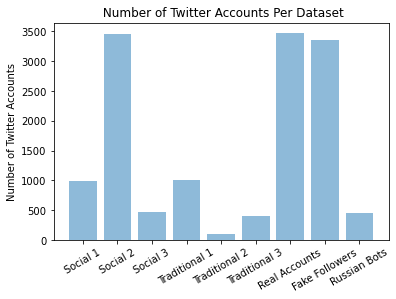

[991, 3457, 464, 1000, 100, 403, 3474, 3351, 453]


In [13]:
# Number of Twitter Accounts Per Dataset
ss1 = len(social_spam_1)
ss2 = len(social_spam_2)
ss3 = len(social_spam_3)
ts1 = len(trad_spam_1)
ts2 = len(trad_spam_2)
ts3 = len(trad_spam_3)
r1 = len(real)
f1 = len(fake_followers)
rus1 = len(rus_users)
# # Average number of followers
# ss1 = social_spam_1['followers_count'].mean()
# ss2 = social_spam_2['followers_count'].mean()
# ss3 = social_spam_3['followers_count'].mean()
# ts1 = trad_spam_1['followers_count'].mean()
# ts2 = trad_spam_2['followers_count'].mean()
# ts3 = trad_spam_3['followers_count'].mean()
# r1 = real['followers_count'].mean()
# f1 = fake_followers['followers_count'].mean()
# rus1 = rus_users['followers_count'].mean()
# # Average number of friends
# ss1 = social_spam_1['friends_count'].mean()
# ss2 = social_spam_2['friends_count'].mean()
# ss3 = social_spam_3['friends_count'].mean()
# ts1 = trad_spam_1['friends_count'].mean()
# ts2 = trad_spam_2['friends_count'].mean()
# ts3 = trad_spam_3['friends_count'].mean()
# r1 = real['friends_count'].mean()
# f1 = fake_followers['friends_count'].mean()
# rus1 = rus_users['friends_count'].mean()
# # Average number of Tweets
# ss1 = social_spam_1['statuses_count'].mean()
# ss2 = social_spam_2['statuses_count'].mean()
# ss3 = social_spam_3['statuses_count'].mean()
# ts1 = trad_spam_1['statuses_count'].mean()
# ts2 = trad_spam_2['statuses_count'].mean()
# ts3 = trad_spam_3['statuses_count'].mean()
# r1 = real['statuses_count'].mean()
# f1 = fake_followers['statuses_count'].mean()
# rus1 = rus_users['statuses_count'].mean()
# # Average number of Favorites Per Dataset
# ss1 = social_spam_1['favourites_count'].mean()
# ss2 = social_spam_2['favourites_count'].mean()
# ss3 = social_spam_3['favourites_count'].mean()
# ts1 = trad_spam_1['favourites_count'].mean()
# ts2 = trad_spam_2['favourites_count'].mean()
# ts3 = trad_spam_3['favourites_count'].mean()
# r1 = real['favourites_count'].mean()
# f1 = fake_followers['favourites_count'].mean()
# rus1 = rus_users['favourites_count'].mean()
sets = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1,rus1]
xlabel = ('Social 1', 'Social 2', 'Social 3', 'Traditional 1', 'Traditional 2', 'Traditional 3',
'Real Accounts', 'Fake Followers', 'Russian Bots')
ypos = np.arange(len(sets))
amount = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1,rus1]
plt.bar(xlabel, sets, align='center', alpha=0.5)
plt.xticks(ypos,xlabel,rotation=30)
# plt.ylabel('Average Number of Followers')
# plt.title('Average Number of Followers Per Account Per Dataset')
plt.ylabel('Number of Twitter Accounts')
plt.title(' Number of Twitter Accounts Per Dataset')
plt.show()
print(sets)

In [14]:
# combine dataframe. append dataframes.
# combine all social spambots
all_trad_spam = pd.concat([trad_spam_1,trad_spam_2,trad_spam_3])
all_social_spambots = pd.concat([social_spam_1,social_spam_2,social_spam_3])
all_bots = pd.concat([all_trad_spam,all_social_spambots,fake_followers])
# df = pd.concat([df,real])
df = pd.concat([real, all_bots])
len(df['default_profile'])
df.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,knownbot
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,,ja,...,15years ago X.Lines24,,,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,0
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,,ja,...,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),,,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,0
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,,en,...,Let me see what your best move is!,,,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,0
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,20. menna: #farida #nyc and the 80s actually y...,,,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,0
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,,en,...,Cosmetologist,,,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,0


In [18]:
# Prepare of Levenshtein Distance
LevD_Rus =[87.22685185185186,75.6484375,93.87158203125,95.54127100073046,84.8611111111111,88.12097304404995,85.50719999999995,0.0,93.0051775147929,92.93727330653853,92.25777777777778,87.29300567107751,78.875,88.66128729592792,98.98937363172149,85.52549427679502,88.27911111111112,92.20204768105165,94.70464852607702,34.5,87.5246913580247,76.22222222222223]
LevD_Real =[65.56188793259464,68.06269743639605,80.99069695768078,35.81521735079752,41.59524071487558,54.80695468844404,69.17062343273791,77.40079028640484,67.02438312151091,69.26917965276283,55.803792341740724,59.65946285291664,70.02652325009018,74.53508708143696,82.96344570432927,72.94090538318754,75.49669423401855,86.23952096036828,59.65265730087915,57.51488084694314,56.52436582043217,59.63556497551856,77.69237444844183,87.1303125,81.64039747253511]
# sort real dataset
real = real.sort_values(by=['screen_name'])
real_Lev = real.tail(25)
real_Lev['LevD'] = LevD_Real
# sort Russian bots dataset
rus_users = rus_users.sort_values(by=['screen_name'])
rus_users_Lev = rus_users.iloc[3:28]
rus_users_Lev = rus_users_Lev.drop(rus_users_Lev.index[18])
rus_users_Lev = rus_users_Lev.drop(rus_users_Lev.index[16])
rus_users_Lev = rus_users_Lev.drop(rus_users_Lev.index[6])
rus_users_Lev['LevD'] = LevD_Rus
df = pd.concat([real_Lev, rus_users_Lev])
real_Lev['LevD'].describe()


<ipython-input-18-e5aa53e16d75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_Lev['LevD'] = LevD_Real


count    25.000000
mean     67.486146
std      13.065710
min      35.815217
25%      59.635565
50%      69.170623
75%      77.400790
max      87.130313
Name: LevD, dtype: float64

In [19]:
df = shuffle(df)
df.head()


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,knownbot,LevD
3468,2419965872,mac,zndmt,400,13,68,54,0,,en-gb,...,,,Mon Mar 31 04:15:13 +0000 2014,2014-03-31 06:15:13,2015-05-01 16:40:44,2016-03-15 16:11:20,0.0,0.0,0,57.514881
3449,1941490830,Daniella,youreashithole,4857,258,308,3868,1,,en,...,,,Sun Oct 06 17:15:51 +0000 2013,2013-10-06 19:15:51,2015-05-01 13:33:56,2016-03-15 16:11:14,1.0,0.0,0,68.062697
3451,3140211968,directionermomo,yukimammomoshu,718,299,166,75,0,,ja,...,,,Sun Apr 05 11:50:03 +0000 2015,2015-04-05 13:50:03,2015-05-02 01:54:07,2016-03-15 16:11:14,0.0,0.0,0,35.815217
71,1686370159,Archie Olivers,ArchieOlivers,1854,2569,3396,1006,28,NaN,en,...,NaN,NaN,Tue Aug 20 17:49:51 +0000 2013,NaN,NaN,NaN,NaN,NaN,1,98.989374
3463,1492049473,Zac Clausen,zclausen1,1087,212,219,1300,0,,en,...,,,Sat Jun 08 05:11:31 +0000 2013,2013-06-08 07:11:31,2015-05-02 06:18:26,2016-03-15 16:11:18,0.0,0.0,0,82.963446


In [20]:
#function that will be used for scoring
# is language english
def scoring (row):
    if row['lang'] == 'en':
        return 1
    else:
        return 0

In [21]:
# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()

0

In [22]:
# create empty DF and add id
score = pd.DataFrame()
score['id'] = df['id']
# assigns function output to new df
score['lang-en'] = df.apply (lambda row: scoring (row),axis=1)

In [23]:
score['id']


3468    2419965872
3449    1941490830
3451    3140211968
71      1686370159
3463    1492049473
122    -2147483648
3465     347709470
3472     121122678
174    -2147483648
3455      41779886
97     -2147483648
166    -2147483648
3043    2855415019
30      1652262638
247     1670762347
144    -2147483648
3471    2980901837
39      1658420976
3448    1378581602
181    -2147483648
63      1679279490
242     1660186831
3470    2874966164
269    -2147483648
3129    2294241263
3464     114016831
3458     342527071
196    -2147483648
3456     944283066
394              0
3450      86432824
320    -2147483648
3457     181191283
3461     612711615
3469     205218909
199    -2147483648
3462    2893155055
68      1685173321
3466    2918581380
359    -2147483648
3454      43831327
3460    1368519996
37      1657833811
150    -2147483648
3459     245152155
3452    2513067457
427              0
Name: id, dtype: int64

In [ ]:
# has profile image.
# change from using profile_banner_url
def scoring (row):
    if row['profile_image_url'] == '':
        return 1
    else:
        return 0
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['profile_pic'] = df.apply (lambda row: scoring (row),axis=1)
score['profile_pic'].tail()


In [25]:
# has screen name.
# change from screen_name to name. screen_name = @handle. name: can be
#changed, not required.
def scoring (row):
    if row['name'] == '':
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['has_screen_name'] = df.apply (lambda row: scoring (row),axis=1)
score['has_screen_name'].head()


3468    0
3449    0
3451    0
71      0
3463    0
Name: has_screen_name, dtype: int64

In [26]:
# has 30 followers
def scoring (row):
    if row['followers_count'] < 30:
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['30followers'] = df.apply (lambda row: scoring (row),axis=1)
score['30followers'].head()


3468    1
3449    0
3451    0
71      0
3463    0
Name: 30followers, dtype: int64

In [27]:
def scoring (row):
    if row['geo_enabled'] == '':
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['geoloc'] = df.apply (lambda row: scoring (row),axis=1)
score['geoloc'].head()


3468    1
3449    0
3451    1
71      0
3463    1
Name: geoloc, dtype: int64

In [28]:
# profile banner contains a link ('http') from profile_banner_url
# change to if the description contains
def scoring (row):
    if row['profile_banner_url'] == '':
        return 0
    else:
        return 1

# def scoring (row):
# if 'http' not in row['description']:
# return 0
# elif row['description'] == '':
# return 1
# else:
# return 1
# df['description'] = df['description']
# def scoring (row):
# if row['description'] == ('http'):
# return 0
# else:
# return 1

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['banner_link'] = df.apply (lambda row: scoring (row),axis=1)
score['banner_link'].head()

3468    1
3449    1
3451    1
71      1
3463    1
Name: banner_link, dtype: int64

In [29]:
# has done 50 tweets
def scoring (row):
    if row['statuses_count'] > 50:
        return 0
    else:
        return 1

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['50tweets'] = df.apply (lambda row: scoring (row),axis=1)
score['50tweets'].head()


3468    0
3449    0
3451    0
71      0
3463    0
Name: 50tweets, dtype: int64

In [30]:
# 2* num followers >= # of friends
def scoring (row):
    if 2*row['followers_count'] >= row['friends_count']:
        return 0
    else:
        return 1

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['twice_num_followers'] = df.apply (lambda row: scoring (row),axis=1)
score['twice_num_followers'].head()

3468    1
3449    0
3451    0
71      0
3463    0
Name: twice_num_followers, dtype: int64

In [31]:
# does not have 1000s of friends, spambot
def scoring (row):
    if row['friends_count'] > 1000:
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['1000friends'] = df.apply (lambda row: scoring (row),axis=1)
score['1000friends'].head()


3468    0
3449    0
3451    0
71      1
3463    0
Name: 1000friends, dtype: int64

In [32]:
# sent less than 20 tweets, spambot
def scoring (row):
    if row['statuses_count'] < 20:
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['1000friends'] = df.apply (lambda row: scoring (row),axis=1)
score['1000friends'].head()

3468    0
3449    0
3451    0
71      0
3463    0
Name: 1000friends, dtype: int64

In [33]:
# egg avatar, default profile image
def scoring (row):
    if row['default_profile_image'] == '':
        return 0
    else:
         return 1
# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['profile_pic'] = df.apply (lambda row: scoring (row),axis=1)
score['profile_pic'].head()


3468    0
3449    0
3451    0
71      1
3463    0
Name: profile_pic, dtype: int64

In [34]:
# Never tweeted
def scoring (row):
    if row['statuses_count'] == 0:
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['NeverTweeted'] = df.apply (lambda row: scoring (row),axis=1)
score['NeverTweeted'].head()

3468    0
3449    0
3451    0
71      0
3463    0
Name: NeverTweeted, dtype: int64

In [35]:
# 50:1 friends/followers
def scoring (row):
    if 50*row['followers_count'] <= row['friends_count']:
        return 1
    else:
         return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['fifty_FriendsFollowersRatio'] = df.apply (lambda row: scoring (row),axis=1)
score['fifty_FriendsFollowersRatio'].head()

3468    0
3449    0
3451    0
71      0
3463    0
Name: fifty_FriendsFollowersRatio, dtype: int64

In [36]:
# 100:1 friends/followers
def scoring (row):
    if 100*row['followers_count'] <= row['friends_count']:
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['hundred_FriendsFollowersRatio'] = df.apply (lambda row: scoring
(row),axis=1)
score['hundred_FriendsFollowersRatio'].head()

3468    0
3449    0
3451    0
71      0
3463    0
Name: hundred_FriendsFollowersRatio, dtype: int64

In [37]:
# Beginning of next draft...
# profile contains a description
def scoring (row):
    if row['description'] == '':
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['has_description'] = df.apply (lambda row: scoring (row),axis=1)
score['has_description'].head()


3468    0
3449    0
3451    0
71      0
3463    0
Name: has_description, dtype: int64

In [38]:
def scoring (row):
    if row['knownbot'] == 1:
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['knownbot'] = df.apply (lambda row: scoring (row),axis=1)
score['knownbot'].head()

3468    0
3449    0
3451    0
71      1
3463    0
Name: knownbot, dtype: int64

In [39]:
# Levenshtein Distance less than 30
def scoring (row):
    if row['LevD'] < 30:
        return 1
    else:
        return 0

# function is applied
df.apply (lambda row: scoring (row),axis=1)
#output of function applied to rows is assigned to df collumn
df['score'] = df.apply (lambda row: scoring (row),axis=1)
# no null values in new score collumn (this collumn could be part of a new df)
df['score'].isnull().values.sum()
# assigns function output to new df
score['Levenshtein'] = df.apply (lambda row: scoring (row),axis=1)
score['Levenshtein'].head()

3468    0
3449    0
3451    0
71      0
3463    0
Name: Levenshtein, dtype: int64

In [40]:
score.shape

(47, 16)

In [41]:
score.describe()


,id,lang-en,has_screen_name,30followers,geoloc,banner_link,50tweets,twice_num_followers,1000friends,profile_pic,NeverTweeted,fifty_FriendsFollowersRatio,hundred_FriendsFollowersRatio,has_description,knownbot,Levenshtein
count,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,4.667577e+08,0.765957,0.042553,0.106383,0.255319,1.0,0.042553,0.234043,0.042553,0.468085,0.042553,0.042553,0.042553,0.127660,0.468085,0.021277
std,1.795635e+09,0.427976,0.204030,0.311661,0.440755,0.0,0.204030,0.427976,0.204030,0.504375,0.204030,0.204030,0.204030,0.337318,0.504375,0.145865
min,-2.147484e+09,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.073742e+09,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.477095e+08,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.682226e+09,1.000000,0.000000,0.000000,0.500000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.140212e+09,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Following code is based from Eric Larson code for his Data Mining Class
#
#https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and
#%20SVM.ipynb
from sklearn.model_selection import ShuffleSplit
# we want to predict the X and y data as follows:
if 'knownbot' in score:
    y = score['knownbot'].values # get the labels we want
    del score['knownbot'] # get rid of the class label
    X = score.values # use everything else to predict!
 ## X and y are now numpy matrices, by calling 'values' on the pandas data
#frames we
 # have converted them into simple matrices to use with scikit learn


# to use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into
# training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
 test_size = 0.2)
print(cv_object)


ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [ ]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object
# now we can use the cv_object that we setup before to iterate through the
# different training and testing sets. Each time we will reuse the logisitic
#regression
# object, but it gets trained on different data each time we use it.

In [ ]:
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y):
 # I will create new variables here so that it is more obvious what
 # the code is doing (you can compact this syntax and avoid duplicating memory,
 # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

 # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train) # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
 # now let's get the accuracy and confusion matrix for this iterations of
#training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

# Also note that every time you run the above code
# it randomly creates a new training and testing set,
# so accuracy will be different each time
# Also note that every time you run the above code
# it randomly creates a new training and testing set,
# so accuracy will be different each time

In [ ]:
# interpret the weights
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = score.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

# does this look correct?

In [ ]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of
#each column.
# However, we do not want to accidentally use the testing data to find out the mean
#and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the
#variables:
## X_train , y_train , X_test, y_test (they were set in a for loop above)
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit
std
# the line of code above only looks at training data to get mean and std and we can
#use it
# to transform new feature data
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set
#(without snooping at the test set values)
# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less
#(can you guess why??)
lr_clf.fit(X_train_scaled,y_train) # train object
y_hat = lr_clf.predict(X_test_scaled) # get test set precitions
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,score.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

In [ ]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
get_ipython().magic('matplotlib inline')
plt.style.use('ggplot')
weights = pd.Series(lr_clf.coef_[0],index=score.columns)
weights.plot(kind='bar')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of
#each column.
# However, we do not want to accidentally use the testing data to find out the mean
#and std (this would be snooping)
from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop
# but this requires the use of PipeLines in scikit.
# A pipeline can apply feature pre-processing and data fitting in one compact
#notation
# Here is an example!
std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05)
# create the pipline
piped_object = Pipeline([('scale', std_scl), # do this
 ('logit_model', lr_clf)]) # and then do this
weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices]) # train object
 # it is a little odd getting trained objects from a pipeline:
    weights.append(piped_object.named_steps['logit_model'].coef_[0])

weights = np.array(weights)

In [ ]:
import plotly
plotly.offline.init_notebook_mode() # run at the start of every notebook
error_y=dict(
 type='data',
 array=np.std(weights,axis=0),
 visible=True
 )
graph1 = {'x': score.columns,
 'y': np.mean(weights,axis=0),
 'error_y':error_y,
 'type': 'bar'}
fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}
plotly.offline.iplot(fig)

In [ ]:
# # not sure if needed so haven't fixed yet
# Xnew = df_imputed[['Age','Pclass','IsMale']].values
# weights = []
# # run the pipline corssvalidated
# for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
# piped_object.fit(Xnew[train_indices],y[train_indices]) # train object
# weights.append(piped_object.named_steps['logit_model'].coef_[0])

# weights = np.array(weights)
# error_y=dict(
# type='data',
# array=np.std(weights,axis=0),
# visible=True
# )
# graph1 = {'x': ['Age','Pclass','IsMale'],
# 'y': np.mean(weights,axis=0),
# 'error_y':error_y,
# 'type': 'bar'}
# fig = dict()
# fig['data'] = [graph1]
# fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}
# plotly.offline.iplot(fig)


In [ ]:
# okay, so run through the cross validation loop and set the training and testing
#variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y):
 # I will create new variables here so that it is more obvious what
 # the code is doing (you can compact this syntax and avoid duplicating memory,
 # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)


In [ ]:
score.head()

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train) # train object
y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


In [ ]:
# SVM Without logistic regression
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X, y) # train object
y_hat = svm_clf.predict(X) # get test set precitions
acc = mt.accuracy_score(y,y_hat)
conf = mt.confusion_matrix(y,y_hat)
print('accuracy:', acc )
print(conf)


In [ ]:
score.head()

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )


In [ ]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df_imputed.columns)
weights.plot(kind='bar')


In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that
#were chosen as support vectors
# now lets look at the support for the vectors and see if we they are indicative of
#anything
# grabe the rows that were selected as support vectors (these are usually instances that
#are hard to classify)
# make a dataframe of the training data
score_tested_on = score.iloc[train_indices] # saved from above, the indices chosen for
#training
# now get the support vectors from the trained model
score_support = score_tested_on.iloc[svm_clf.support_,:]
score_support['knownbot'] = y[svm_clf.support_] # add back in the 'Survived'
#Column to the pandas dataframe
score['knownbot'] = y # also add it back in for the original data
score_support.info()

In [ ]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot
# group the original data and the support vectors
df_grouped_support = score_support.groupby(['knownbot'])
df_grouped = score.groupby(['knownbot'])
# plot KDE of Different variables
vars_to_plot = ['banner_link','profile_pic','has_screen_name','30followers']
for v in vars_to_plot:
    plt.figure(figsize=(10,4))
 # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde()
    plt.legend(['real','bot'])
    plt.title(v+' (Instances chosen as Support Vectors)')

 # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde()
    plt.legend(['real','bot'])
    plt.title(v+' (Original)')

In [ ]:
Lev.distance('Phillip Efthimion', '@RTscott_payne: Phillip Efthimion')

In [ ]:
tweets = pd.read_csv('social_spambots_2.csv/tweets.csv')
tweets = tweets.fillna('')
tweets['text'] = tweets['text'].astype(str)
tweets.info()
rus_users['followers_count'] = rus_users['followers_count'].fillna(0).astype(int)


In [ ]:
choices = tweets['text'][3:20]
process.extract(tweets['text'][2], choices, limit=2)
#process.extractOne(tweets['text'][1], choices)
